# Projects

This page shows stats about the Open Seeds projects

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [2]:
baseurl = "https://raw.githubusercontent.com/open-life-science/open-life-science.github.io/main/_data/artifacts/openseeds/"
project_df = (
    pd.read_csv(f"{baseurl}projects.csv", index_col=0, na_filter= False)
    .assign(
        participants=lambda df: df.participants.str.split(", "),
        participantNb=lambda df: df.participants.str.len(),
        mentors=lambda df: df.mentors.str.split(", "),
        keywords=lambda df: df.keywords.str.split(", "),
        cohort=lambda df: "OLS-" + df.cohort.astype(str),
    )
)

Number of projects over all cohorts

In [3]:
len(project_df)

237

## Cohorts

In [4]:
cohort_df = (
    project_df
    .groupby(by="cohort")
    .count()
    .drop(columns = ["participants", "mentors", "description", "keywords", "status", "collaboration", "participantNb"])
    .rename(columns = {"name": "Total"})
)

Mean number of projects per cohort

In [5]:
cohort_df.Total.mean()

29.625

Text(0.5, 0, '')

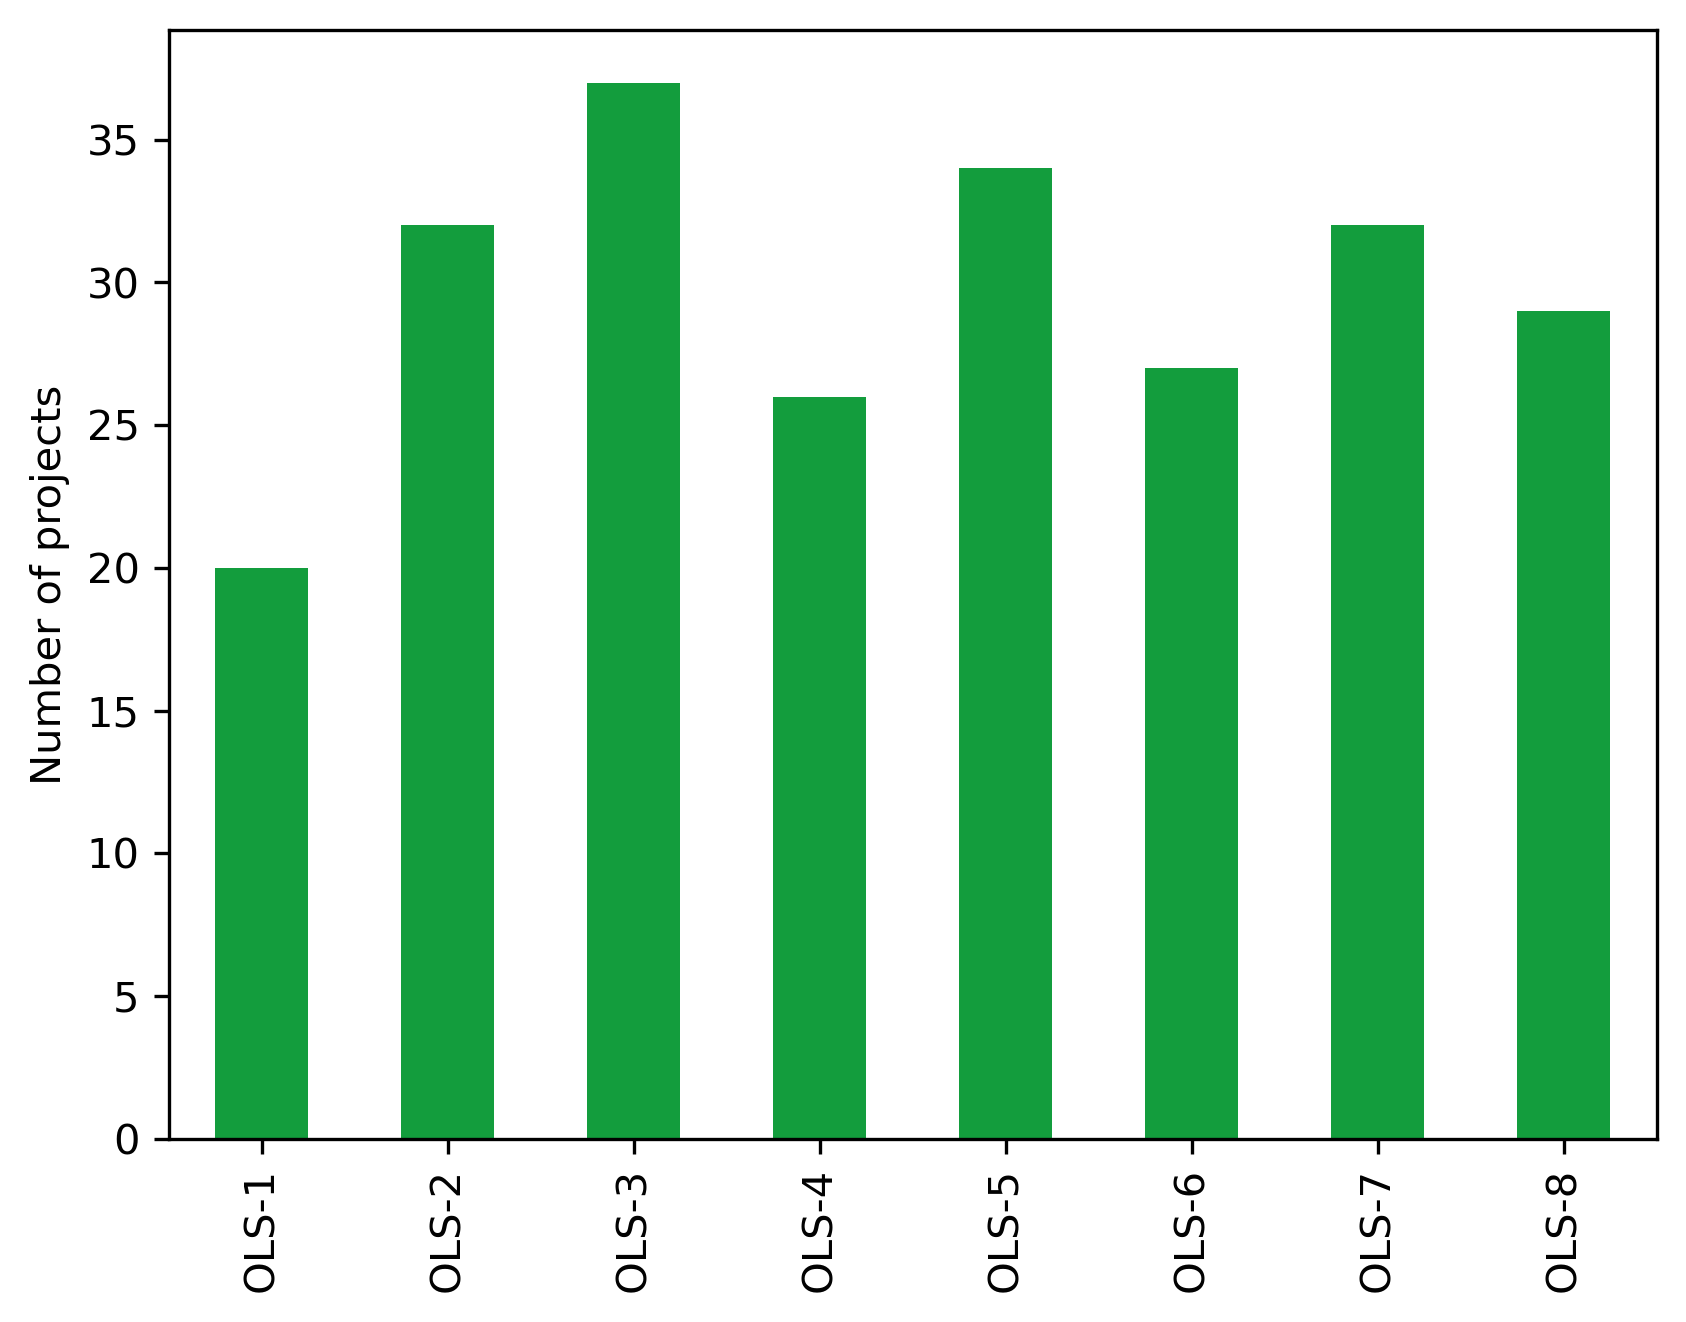

In [6]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_df.Total
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Number of projects")
plt.xlabel("")

## Participants

Mean number of participants per projects

In [7]:
project_df.participantNb.mean()

1.7468354430379747

Distribution of the number of participants per project

Text(0.5, 0, 'Number of participants per projects')

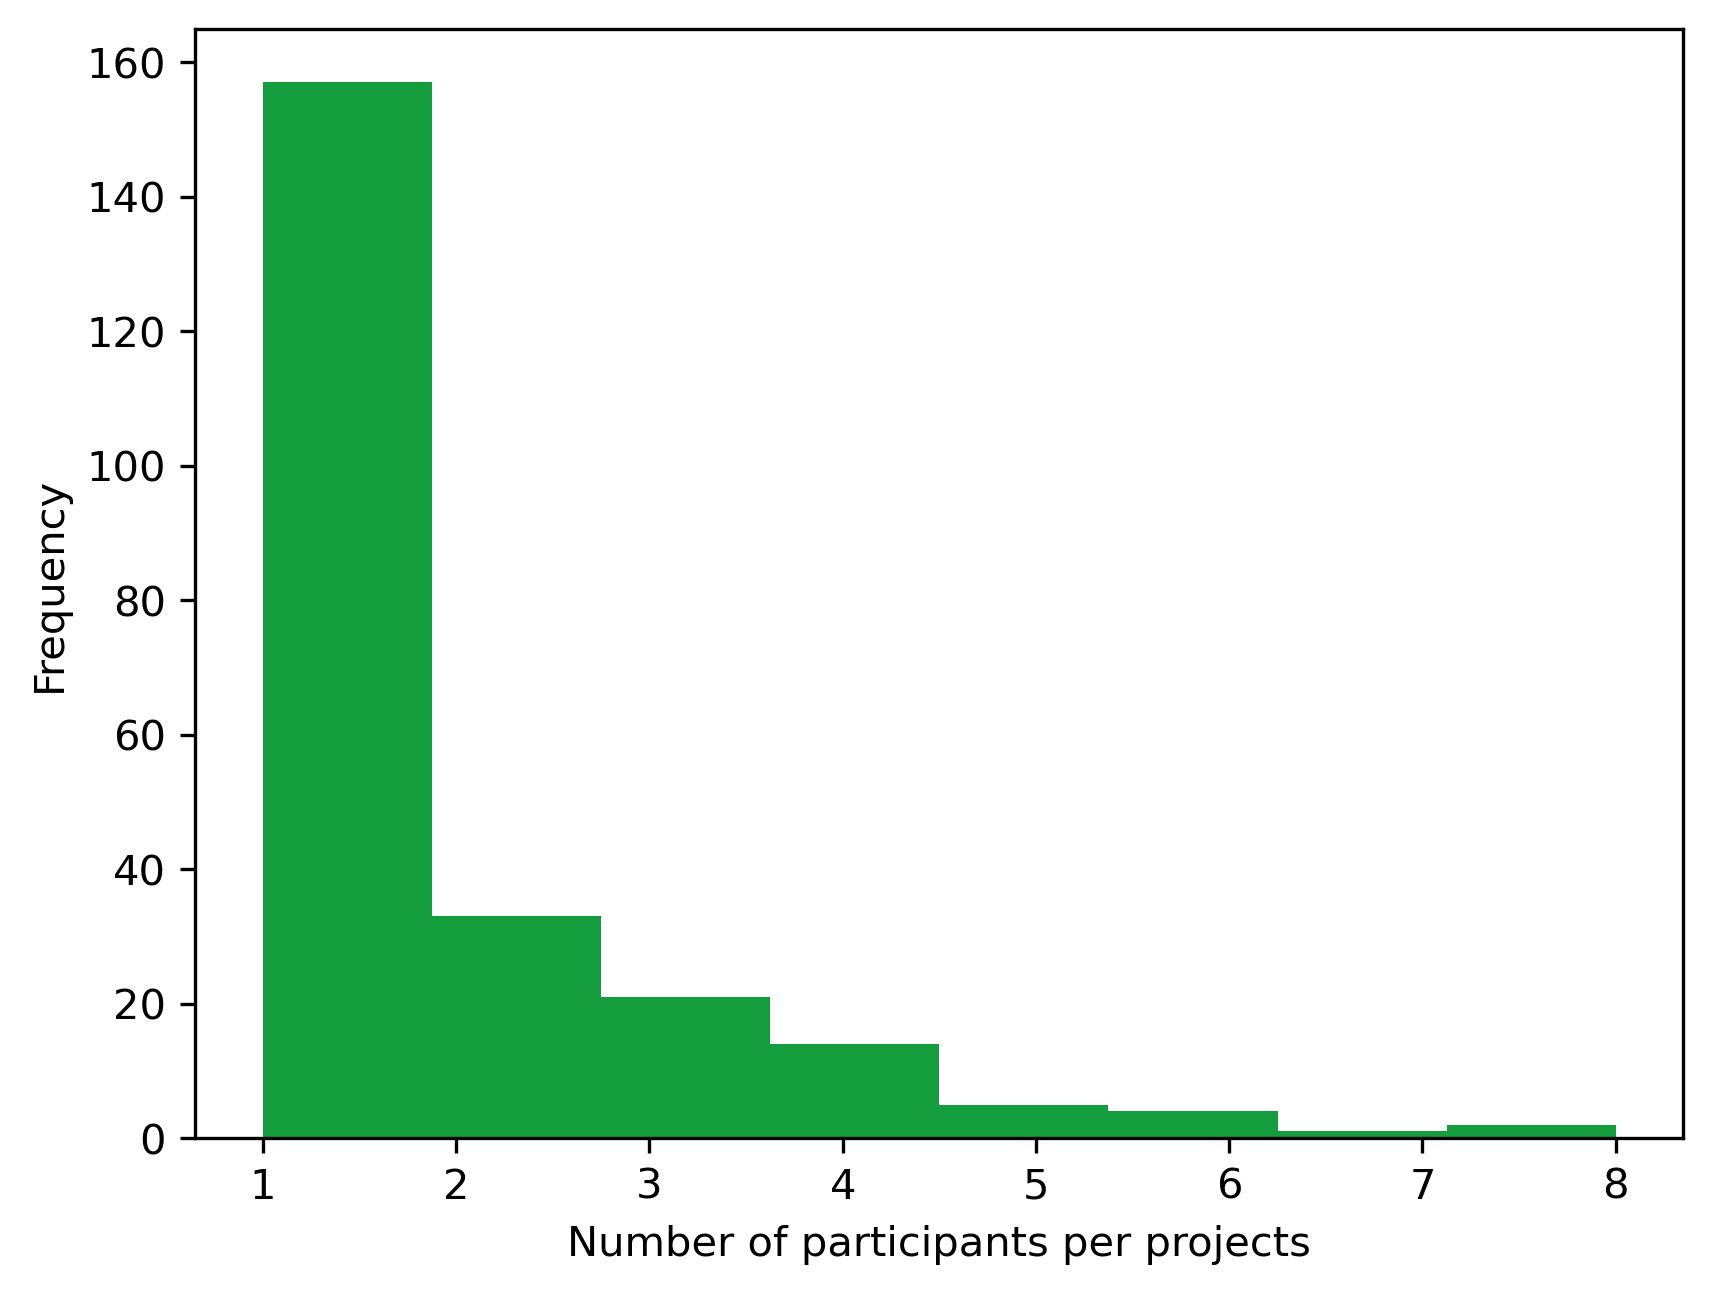

In [8]:
fig, ax = plt.subplots()
fig.set_dpi(300)
project_df.participantNb.plot.hist(
    bins=8, ax=ax, legend=False, color="#139D3D"
)
plt.xlabel('Number of participants per projects')

Text(0.5, 0, '')

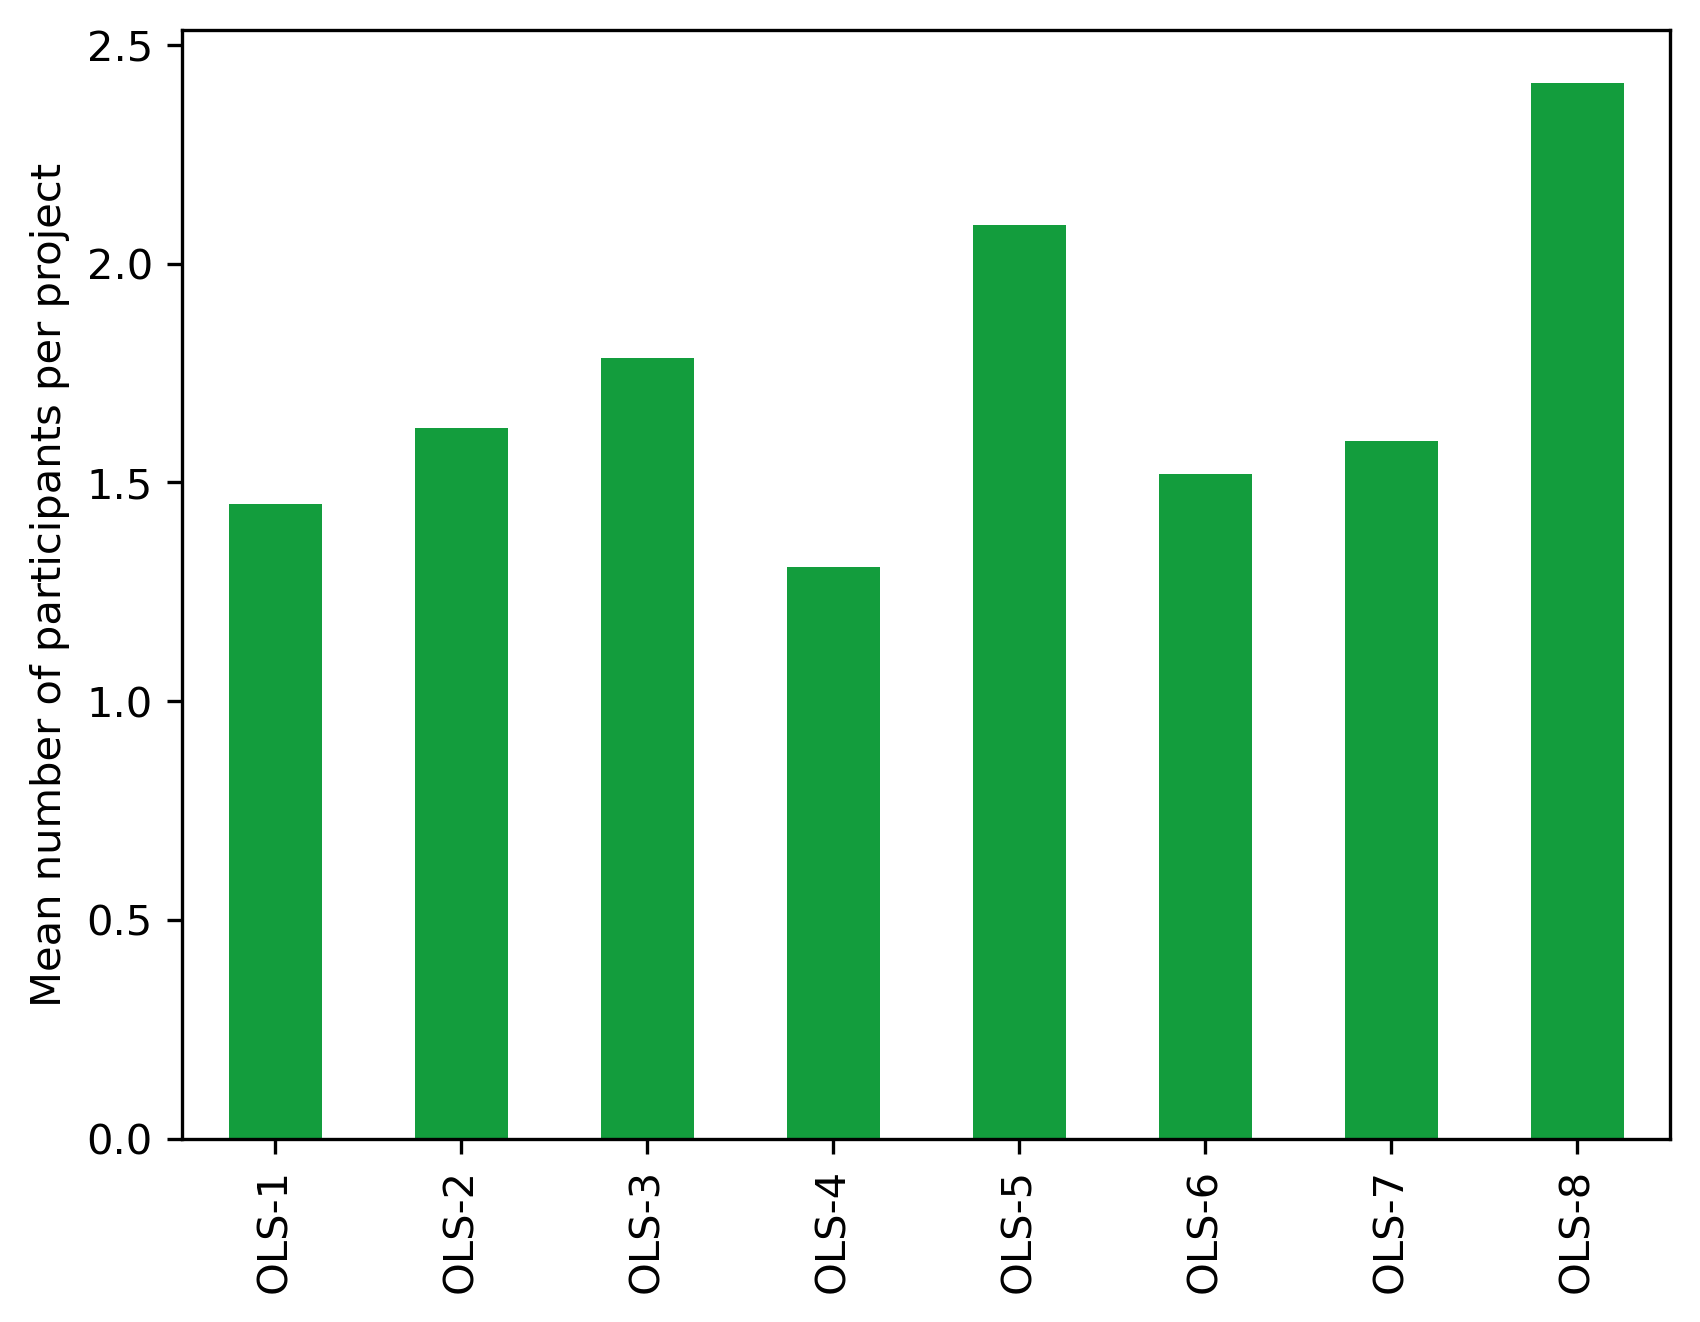

In [9]:
cohort_df = (project_df
    .drop(columns = ["name", "participants", "mentors", "description", "keywords", "status", "collaboration"])
    .groupby(by="cohort")
    .mean()
)
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_df.participantNb
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Mean number of participants per project")
plt.xlabel("")

## Keywords

In [10]:
keyword_df = (project_df
    .drop(columns = ["participantNb", "participants", "mentors", "description", "status", "cohort", "collaboration"])
    .explode("keywords")
    .assign(keywords=lambda df: df.keywords.str.capitalize())
    .replace("Community building", "Community")
    .replace("Research community", "Community")
    .replace("Ethics of ai", "Ethical AI")
    .replace("Ethical ai", "Ethical AI")
    .replace("Enviromental", "Environmental science")
    .replace("Equal opportunity", "Equality")
    .replace("Training", "Training and education")
    .replace("Education", "Training and education")
    .replace("Artificial intelligence", "AI")
    .replace("Ai", "AI")
    .replace("Fair", "FAIR")
    .replace("Open-source", "Open source")
    .replace("Open source software", "Open source")
    .replace("Opensource", "Open source")
    .replace("Os", "Open source")
    .replace("Open source projects", "Open source")
    .replace(" data science", "Data science")
    .replace("Visualisation", "Data visualisation")
    .replace("Next-generation sequencing", "Sequencing")
    .replace("Open educational resource", "Open education")
    .replace("Reproducible research", "Reproducibility")
    .replace("Data", "Data science")
    .replace("Open community", "Community")
    .groupby(by="keywords")
    .count()
    .rename(columns={"name": "Frequency"})
    .sort_values("Frequency", ascending=False)
)


In [13]:
keyword_df.head(10)

,Frequency
keywords,
,63
Community,35
Open science,19
Training and education,19
Open source,18
Reproducibility,13
Data science,12
Machine learning,9
Bioinformatics,9


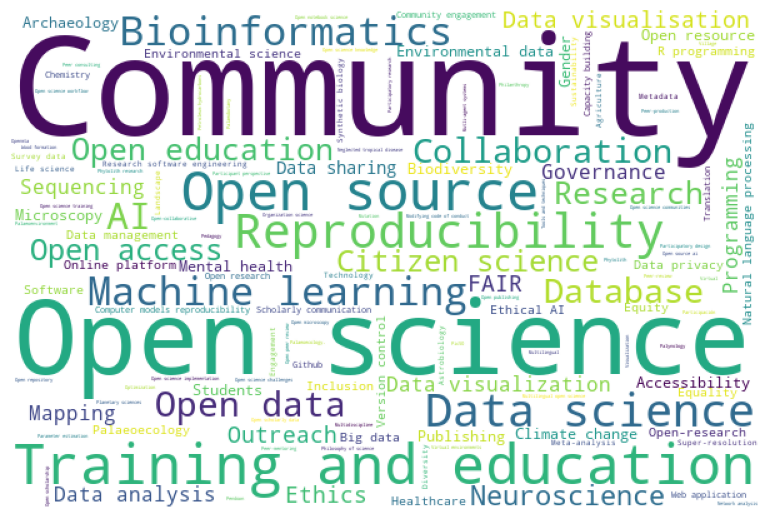

In [12]:
frec = keyword_df.Frequency.to_dict()

wc = WordCloud(
    background_color="rgba(255, 255, 255, 0)",
    random_state=42,
    width=600,
    height=400,
)

wordcloud = wc.generate_from_frequencies(frec)

fig, ax = plt.subplots(figsize=(13, 5))
ax.imshow(wc)

plt.axis("off")
plt.tight_layout(pad=0)
plt.show()